# Bike Sharing Assignment

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.



```
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations
```


In [1]:
# importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error 

In [2]:
# changing pandas visual settings to get all rows and columns
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

## Data Understanding

In [3]:
# reading the dataset
day_df = pd.read_csv("./day.csv")

In [4]:
# checking the shape of the dataframe
day_df.shape

(730, 16)

In [5]:
# checking how dataframe looks
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# checking datatypes and shape of dataframe
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# checking for null values
day_df.isnull().mean()*100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

```
No null values found
```

In [8]:
# checking statistical information about numerical columns
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
# checking for duplicate rows in dataframe
day_df.duplicated().sum()

0

```
No duplicate rows found in dataframe
```

In [10]:
# checking the number of unique values
day_df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [11]:
# checking the dataframe
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


```
Variables to deal with in data cleaning.

['instant'] - Redundant variable as it is the row number. 
['dteday'] - Redundant as we have month, season, weekday, workingday,year
['casual','registered'] - cnt is the Summation of these features.  
['season', 'mnth', 'weathersit', 'weekday'] - convert the numbers into categories as right now it shows that these variables are ordinal but they are not. 

```

## Data Cleaning

In [12]:
# Removing redundant variables
day_df.drop(['instant','dteday','casual','registered'],axis="columns",inplace=True)

In [13]:
# Checking the dataframe
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
# mapping the numeric categorical variables to their values
day_df['season'] = day_df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
day_df['mnth'] = day_df['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
day_df['weekday'] = day_df['weekday'].map({0:"Sun" ,1: 'Mon', 2: 'Tues', 3: 'Wed', 4: 'Thurs', 5: 'Fri', 6: 'Sat'})
day_df['weathersit'] = day_df['weathersit'].map({1:'Clear',2:'Cloudy',3:'Light_snow_rain',4:'Heavy_snow_rain'})


In [15]:
# checking the dataframe
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tues,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Bivariate Analysis

In [16]:
# creating a function to make bar plot between categorical and numerical variable

def create_bar_plot(feature,hue_feature=None):
    sns.barplot(data=day_df,x=feature,y='cnt',hue=hue_feature)
    plt.show()

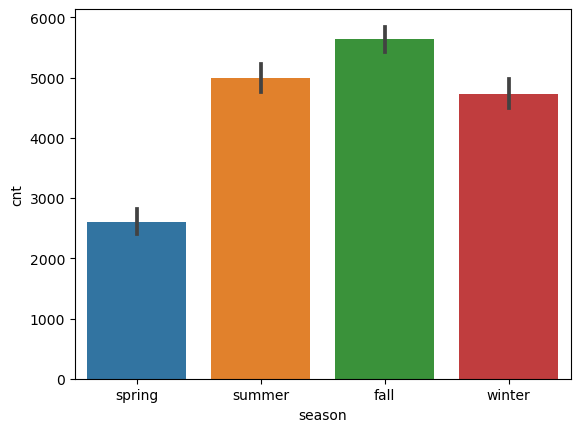

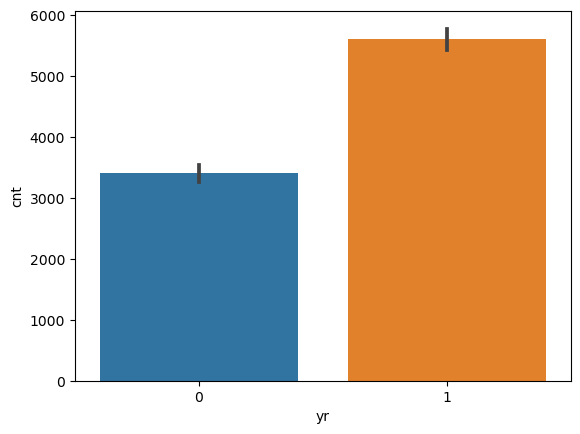

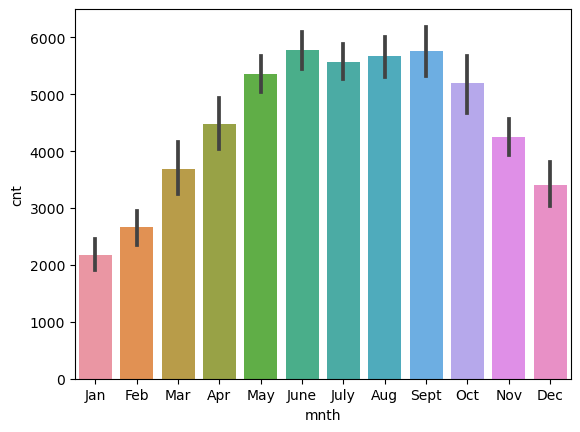

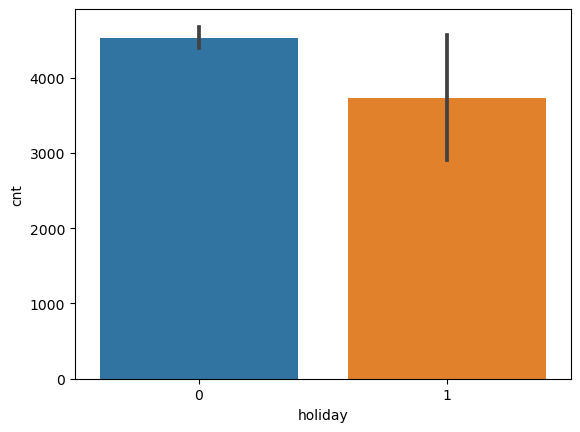

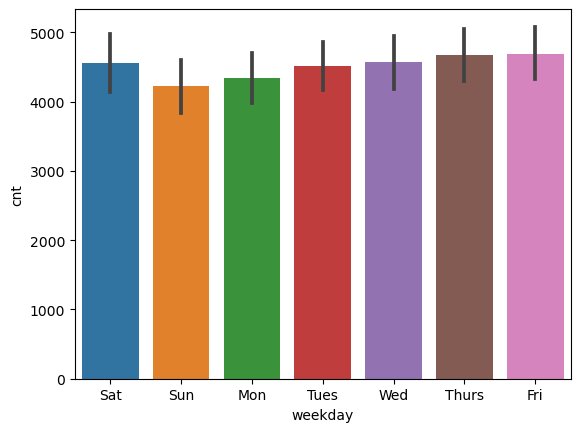

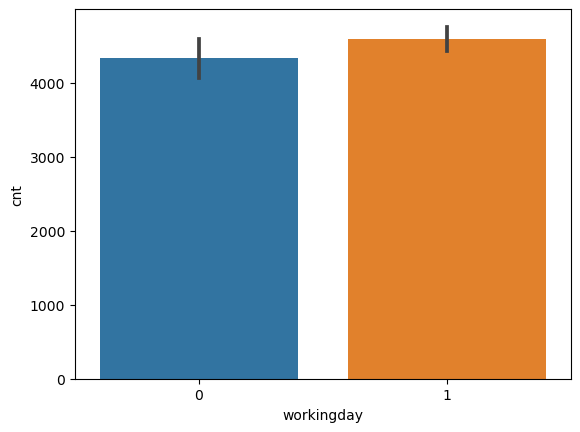

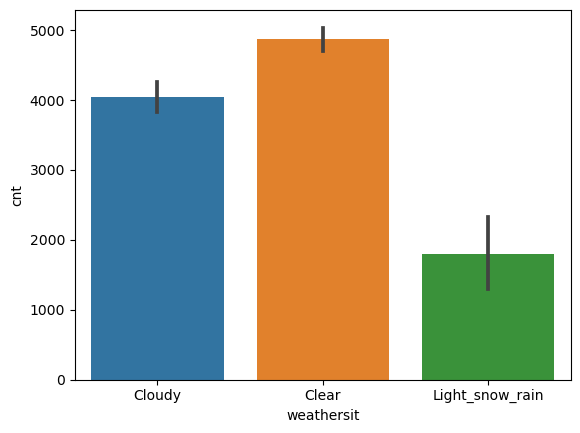

In [17]:
# plotting bar plot between cnt and categorical variables
for feature in ['season','yr','mnth','holiday','weekday','workingday','weathersit']:
    create_bar_plot(feature)

```
'Season' - fall season has the most count of people using boom bikes. Spring season has the least

'Mnth' - Most of the bookings has been done during the month of may, june, july, aug, sep and oct. Trend increased starting of the year till mid of the year and then it started decreasing as we approached the end of year.

'Weekday' - Sunday has the least users and the users increases from monday to friday.

'weathersit' - more people tend to use bikes when the weather is ‘clear’.

'Workingday' - Booking seemed to be almost equal either on working day or non-working day.

'Holiday' - Bikes are more used when there is no holiday.

'Yr' - 2019 attracted more number of booking from the previous year.
```

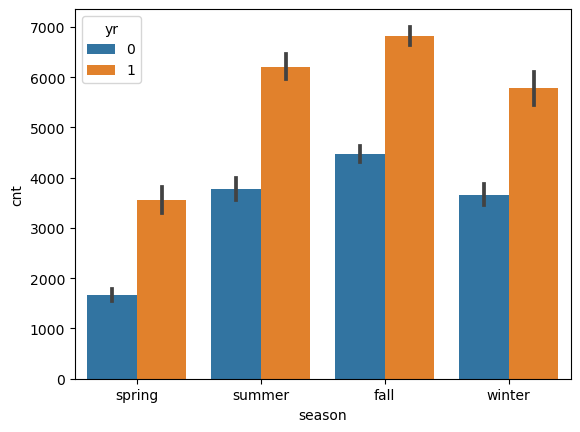

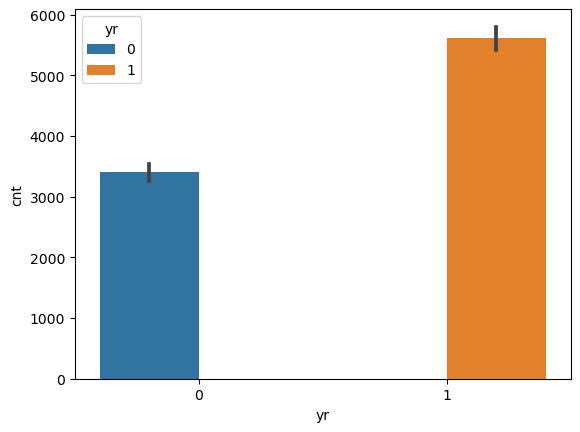

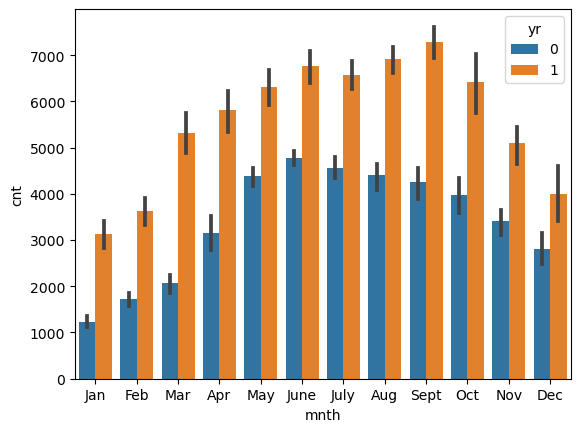

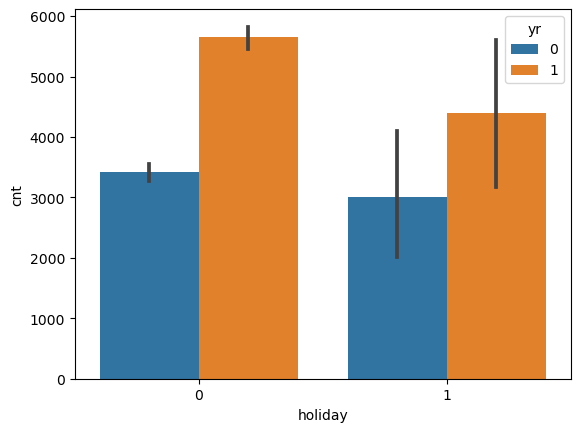

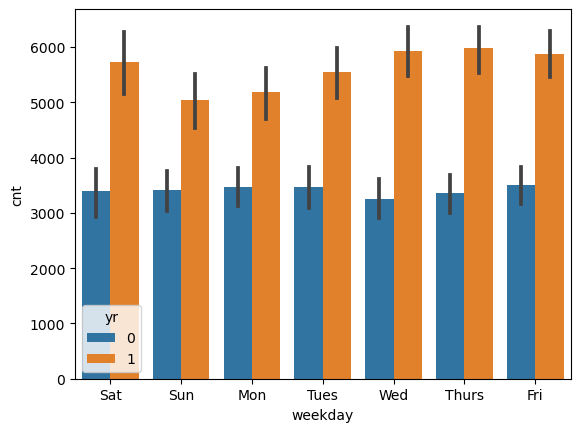

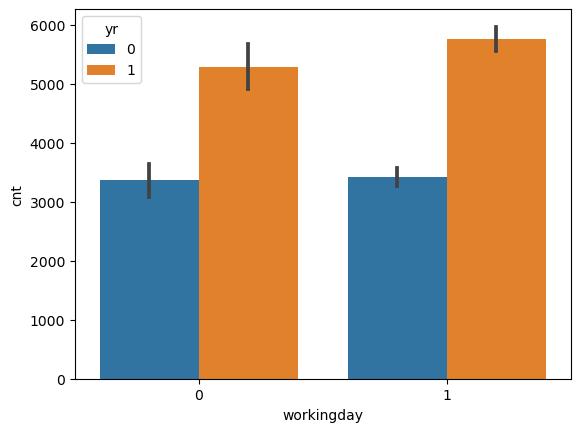

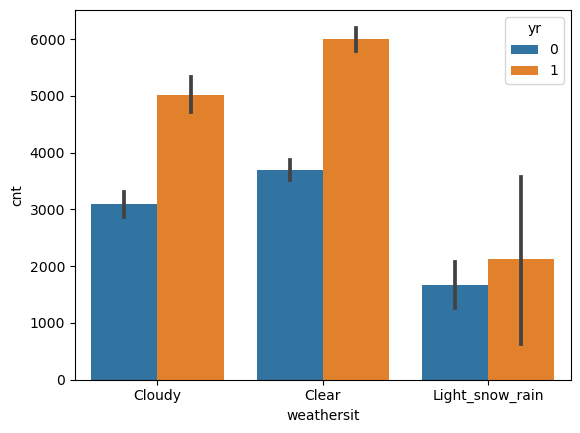

In [18]:
# plotting bar chart between categorical and target variable with hue as yr
for feature in ['season','yr','mnth','holiday','weekday','workingday','weathersit']:
    create_bar_plot(feature,'yr')

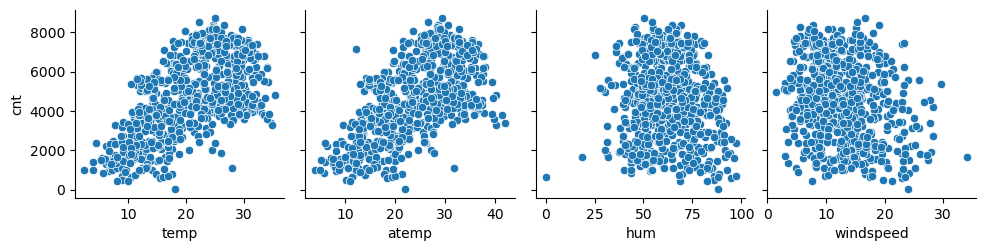

In [19]:
# creating a pairplot between the numerical variables
sns.pairplot(data=day_df,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt')
plt.show()

```
‘temp' and 'atemp' variables have the highest correlation with the target variable.
```

/var/folders/x4/l3h030710y96nwrcjbs0czsc0000gn/T/ipykernel_1417/2136739841.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(day_df.corr(),annot=True,cmap='mako')


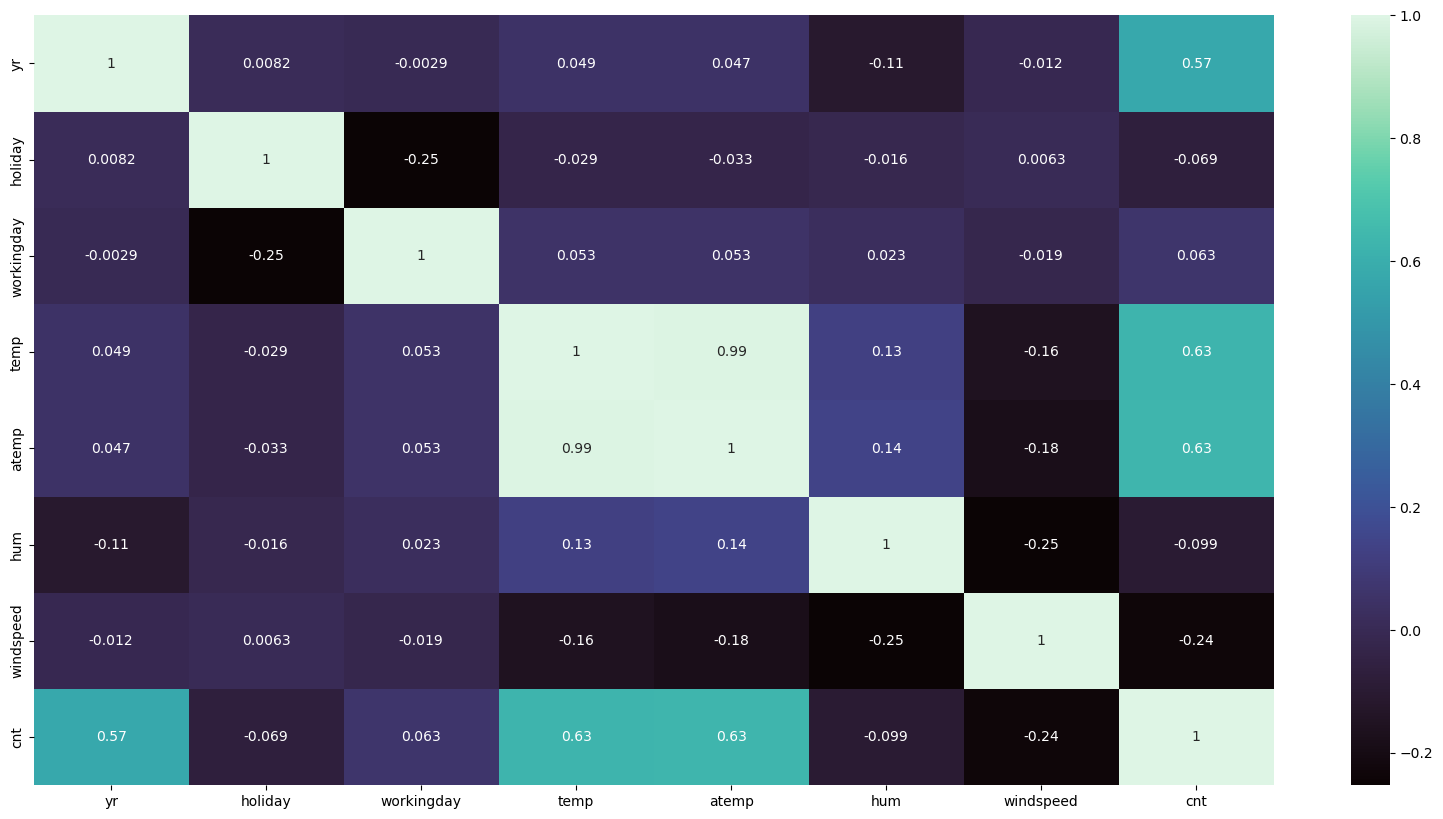

In [20]:
# plotting heatmap for dataframe.
plt.figure(figsize=(20,10))
sns.heatmap(day_df.corr(),annot=True,cmap='mako')
plt.show()

```
There is 0.99 correlation between 'temp' and 'atemp'. We will deal with these features while performing RFE.
```

## Data Preparation 

In [21]:
# creating dummy variables for categorical features.

months_df = pd.get_dummies(day_df['mnth'], drop_first=True)
weekdays_df=pd.get_dummies(day_df['weekday'],drop_first=True)
weathersit_df=pd.get_dummies(day_df['weathersit'],drop_first=True)
seasons_df=pd.get_dummies(day_df['season'],drop_first=True)

In [22]:
# concatinating the dummy variables with main dataframe

day_df = pd.concat([day_df,months_df,weekdays_df,weathersit_df,seasons_df],axis="columns")

In [23]:
# checking how dataframe looks after adding dummy variables 
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept,Mon,Sat,Sun,Thurs,Tues,Wed,Cloudy,Light_snow_rain,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1,spring,0,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Tues,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [24]:
# dropping the source of dummy variables
day_df.drop(['mnth','weekday','weathersit','season'],inplace=True,axis='columns')

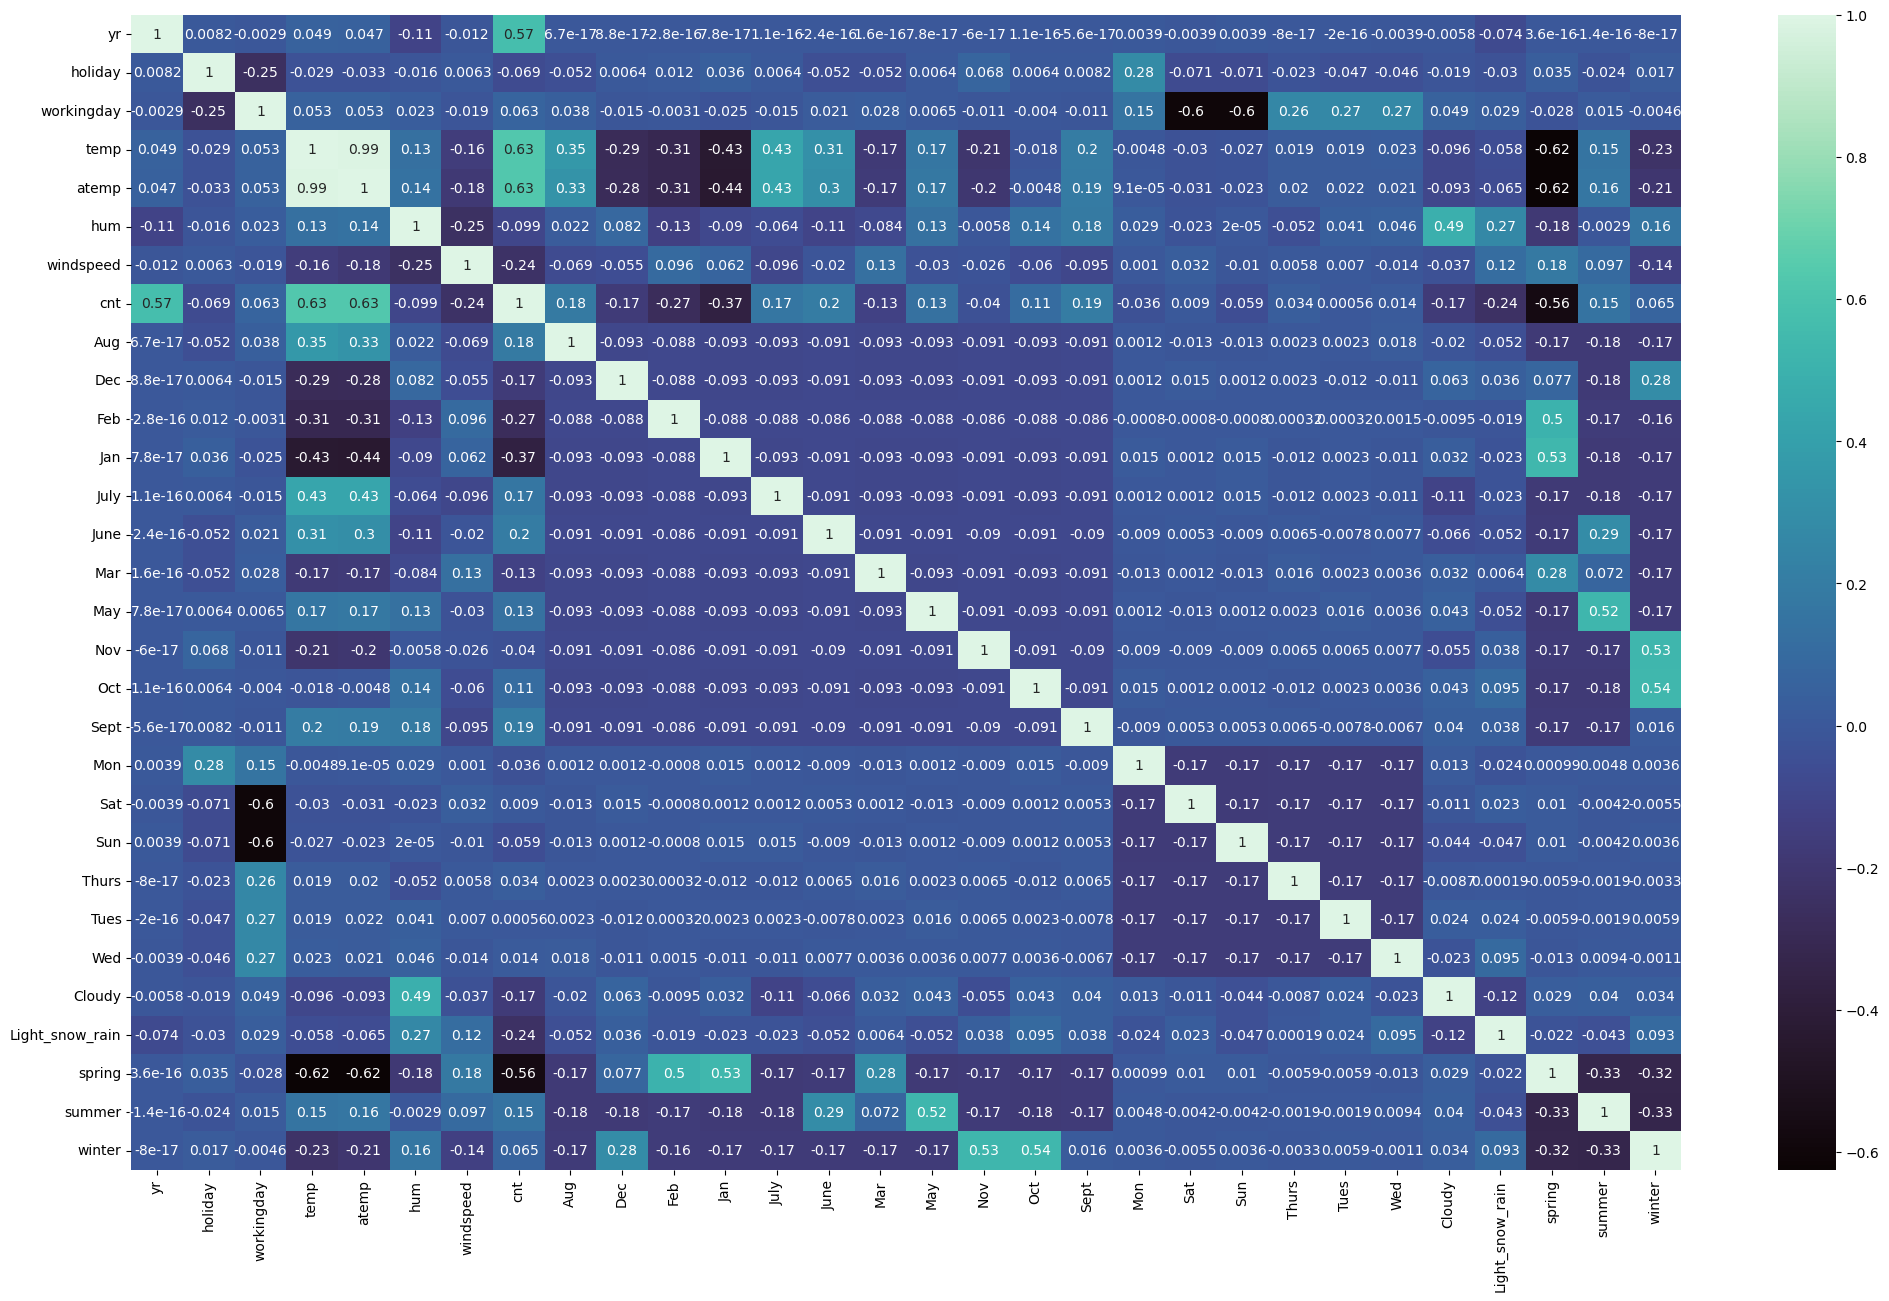

In [25]:
# creating a heatmap to show correlation after adding dummy variables.
plt.figure(figsize=(25,15))
sns.heatmap(day_df.corr(),annot=True,cmap="mako")
plt.show()

## Model Building

In [26]:
# dividing the dataset into test and train dataset 
train_df, test_df = train_test_split(day_df,train_size=0.7,random_state=100)

In [27]:
# printing the shape of training and testing dataset
print('Train Dataset: ',train_df.shape)
print('Test Dataset: ',test_df.shape)

Train Dataset:  (510, 30)
Test Dataset:  (220, 30)


In [28]:
# scaling the variables with min max scaler.
numerical_variables = ['temp','hum','windspeed','cnt']
scaler = MinMaxScaler()
train_df[numerical_variables] = scaler.fit_transform(train_df[numerical_variables])

In [29]:
# checking description after scaling.
train_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept,Mon,Sat,Sun,Thurs,Tues,Wed,Cloudy,Light_snow_rain,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,23.500287,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.345098,0.029412,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,8.090963,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475867,0.169124,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,3.953480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,16.603063,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,24.131150,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,30.177700,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,42.044800,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
# generating x and y datasets
y_train = train_df.pop("cnt")
X_train = train_df

### RFE

In [31]:
# creating linear regression model with sklearn.
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
# using rfe to select some features from the model.

rfe = RFE(lr, n_features_to_select=15).fit(X_train, y_train)

In [33]:
# listing all the features after rfe.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 15),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 5),
 ('Dec', False, 11),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 8),
 ('Mar', False, 14),
 ('May', False, 3),
 ('Nov', False, 4),
 ('Oct', True, 1),
 ('Sept', True, 1),
 ('Mon', False, 6),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thurs', False, 9),
 ('Tues', False, 7),
 ('Wed', False, 10),
 ('Cloudy', True, 1),
 ('Light_snow_rain', True, 1),
 ('spring', True, 1),
 ('summer', False, 12),
 ('winter', False, 13)]

In [34]:
# printing and saving selected columns after RFE.
selected_columns = X_train.columns[rfe.support_]
print('Dropped Columns: ',list(X_train.columns[~rfe.support_]))
print('Selected Columns: ',list(selected_columns))

Dropped Columns:  ['atemp', 'Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Mon', 'Thurs', 'Tues', 'Wed', 'summer', 'winter']
Selected Columns:  ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jan', 'July', 'Oct', 'Sept', 'Sat', 'Sun', 'Cloudy', 'Light_snow_rain', 'spring']


In [35]:
# using the rfe selected columns and adding constant to that dataframe.
X_train_rfe = X_train[selected_columns]
X_train_rfe = sm.add_constant(X_train_rfe)


In [36]:
# creating a function to calculate vif.
def calculate_vif(X_train):
    vif = pd.DataFrame()
    vif['features'] = X_train.columns
    vif['Vif']  = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif = vif.sort_values(by="Vif",ascending=False)
    return vif

#### Model 1

In [37]:
# generating the first model.

lr_1 = sm.OLS(y_train,X_train_rfe).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.3
Date:                Mon, 10 Apr 2023   Prob (F-statistic):          8.67e-190
Time:                        10:55:56   Log-Likelihood:                 513.76
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     495   BIC:                            -934.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2876      0.024     12.140      0.000       0.241       0.334
yr                  0.2336      0.008     28.952      0.000       0.218       0.249
holiday             0.0080      0.021      0.383      0.702      -0.033       0.049
workingday          0.1044      0.009     11.455      0.000       0.087       0.122
temp                0.3966      0.026     15.192      0.000       0.345       0.448
hum                -0.1325      0.037     -3.572      0.000      -0.205      -0.060
windspeed          -0.1852      0.025     -7.269      0.000      -0.235      -0.135
Jan                -0.0496      0.017     -2.874      0.004      -0.084      -0.016
July               -0.0679      0.017     -3.962      0.000      -0.102      -0.034
Oct                 0.0635      0.015      4.192      0.000       0.034       0.093
Sept                0.0671      0.016      4.323      0.000       0.037       0.098
Sat                 0.1150      0.011     10.273      0.000       0.093       0.137
Sun                 0.0601      0.012      5.101      0.000       0.037       0.083
Cloudy             -0.0611      0.010     -5.883      0.000      -0.082      -0.041
Light_snow_rain    -0.2628      0.026     -9.962      0.000      -0.315      -0.211
spring             -0.1231      0.013     -9.380      0.000      -0.149      -0.097
==============================================================================
Omnibus:                       76.164   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.157
Skew:                          -0.738   Prob(JB):                     4.65e-45
Kurtosis:                       5.725   Cond. No.                     1.38e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.65e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [38]:
# calculating the vif score for features.
X_train_rfe.pop("const")
calculate_vif(X_train_rfe)

,features,Vif
2,workingday,36.544778
10,Sat,8.911689
11,Sun,8.687282
1,holiday,2.325976
3,temp,2.200046
14,spring,2.008258
4,hum,1.853111
12,Cloudy,1.545536
6,Jan,1.520418
7,July,1.313893


```
Removing 'holiday' feature due to high p value.
```

In [39]:
# dropping holiday feature 
X_train_rfe.drop("holiday",inplace=True,axis='columns')


#### Model 2

In [40]:
# creating model.
X_train_rfe = sm.add_constant(X_train_rfe)
lr_2 = sm.OLS(y_train,X_train_rfe).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.3
Date:                Mon, 10 Apr 2023   Prob (F-statistic):          8.67e-190
Time:                        10:55:56   Log-Likelihood:                 513.76
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     495   BIC:                            -934.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2957      0.038      7.793      0.000       0.221       0.370
yr                  0.2336      0.008     28.952      0.000       0.218       0.249
workingday          0.0964      0.026      3.777      0.000       0.046       0.147
temp                0.3966      0.026     15.192      0.000       0.345       0.448
hum                -0.1325      0.037     -3.572      0.000      -0.205      -0.060
windspeed          -0.1852      0.025     -7.269      0.000      -0.235      -0.135
Jan                -0.0496      0.017     -2.874      0.004      -0.084      -0.016
July               -0.0679      0.017     -3.962      0.000      -0.102      -0.034
Oct                 0.0635      0.015      4.192      0.000       0.034       0.093
Sept                0.0671      0.016      4.323      0.000       0.037       0.098
Sat                 0.1070      0.027      3.965      0.000       0.054       0.160
Sun                 0.0521      0.027      1.919      0.055      -0.001       0.105
Cloudy             -0.0611      0.010     -5.883      0.000      -0.082      -0.041
Light_snow_rain    -0.2628      0.026     -9.962      0.000      -0.315      -0.211
spring             -0.1231      0.013     -9.380      0.000      -0.149      -0.097
==============================================================================
Omnibus:                       76.164   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.157
Skew:                          -0.738   Prob(JB):                     4.65e-45
Kurtosis:                       5.725   Cond. No.                         23.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# calculating the vif score for features.

X_train_rfe.pop("const")
calculate_vif(X_train_rfe)

,features,Vif
3,hum,25.107597
1,workingday,16.504647
2,temp,13.634034
4,windspeed,4.537197
9,Sat,4.443795
10,Sun,4.342922
13,spring,2.488913
11,Cloudy,2.187558
0,yr,2.067188
5,Jan,1.656255


```
Removing 'Sun' feature because it has p value greater than 0.05
```

In [42]:
# dropping hum feature
X_train_rfe.drop("Sun",inplace=True,axis='columns')

#### Model 3

In [43]:
# creating model.
X_train_rfe = sm.add_constant(X_train_rfe)

lr_3 = sm.OLS(y_train,X_train_rfe).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.7
Date:                Mon, 10 Apr 2023   Prob (F-statistic):          3.68e-190
Time:                        10:55:56   Log-Likelihood:                 511.87
No. Observations:                 510   AIC:                            -995.7
Df Residuals:                     496   BIC:                            -936.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3387      0.031     11.046      0.000       0.278       0.399
yr                  0.2338      0.008     28.897      0.000       0.218       0.250
workingday          0.0521      0.011      4.760      0.000       0.031       0.074
temp                0.3979      0.026     15.203      0.000       0.346       0.449
hum                -0.1317      0.037     -3.540      0.000      -0.205      -0.059
windspeed          -0.1856      0.026     -7.264      0.000      -0.236      -0.135
Jan                -0.0500      0.017     -2.887      0.004      -0.084      -0.016
July               -0.0669      0.017     -3.899      0.000      -0.101      -0.033
Oct                 0.0639      0.015      4.205      0.000       0.034       0.094
Sept                0.0652      0.016      4.200      0.000       0.035       0.096
Sat                 0.0628      0.014      4.451      0.000       0.035       0.091
Cloudy             -0.0607      0.010     -5.834      0.000      -0.081      -0.040
Light_snow_rain    -0.2622      0.026     -9.914      0.000      -0.314      -0.210
spring             -0.1234      0.013     -9.377      0.000      -0.149      -0.098
==============================================================================
Omnibus:                       81.487   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.081
Skew:                          -0.777   Prob(JB):                     8.07e-50
Kurtosis:                       5.868   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
X_train_rfe.pop("const")
calculate_vif(X_train_rfe)

,features,Vif
3,hum,17.243171
2,temp,12.879633
1,workingday,4.642619
4,windspeed,4.089287
12,spring,2.413594
10,Cloudy,2.114520
0,yr,2.046117
9,Sat,1.809770
5,Jan,1.652601
6,July,1.419254


```
Removing 'hum' due to high vif score.
```

In [45]:
# removing workingday feature.
X_train_rfe.drop("hum",inplace=True,axis='columns')

#### Model 4

In [46]:
# creating model.

X_train_rfe = sm.add_constant(X_train_rfe)

lr_4 = sm.OLS(y_train,X_train_rfe).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.7
Date:                Mon, 10 Apr 2023   Prob (F-statistic):          1.16e-188
Time:                        10:55:56   Log-Likelihood:                 505.51
No. Observations:                 510   AIC:                            -985.0
Df Residuals:                     497   BIC:                            -930.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2578      0.021     12.466      0.000       0.217       0.298
yr                  0.2368      0.008     29.088      0.000       0.221       0.253
workingday          0.0546      0.011      4.938      0.000       0.033       0.076
temp                0.3817      0.026     14.644      0.000       0.330       0.433
windspeed          -0.1591      0.025     -6.438      0.000      -0.208      -0.111
Jan                -0.0518      0.018     -2.961      0.003      -0.086      -0.017
July               -0.0610      0.017     -3.531      0.000      -0.095      -0.027
Oct                 0.0572      0.015      3.755      0.000       0.027       0.087
Sept                0.0618      0.016      3.939      0.000       0.031       0.093
Sat                 0.0666      0.014      4.682      0.000       0.039       0.095
Cloudy             -0.0816      0.009     -9.406      0.000      -0.099      -0.065
Light_snow_rain    -0.2983      0.025    -12.088      0.000      -0.347      -0.250
spring             -0.1214      0.013     -9.134      0.000      -0.148      -0.095
==============================================================================
Omnibus:                       83.313   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.400
Skew:                          -0.791   Prob(JB):                     2.08e-51
Kurtosis:                       5.912   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# calculating vif.
X_train_rfe.pop("const")
calculate_vif(X_train_rfe)

,features,Vif
2,temp,6.631156
1,workingday,4.337752
3,windspeed,4.018276
11,spring,2.214446
0,yr,2.045508
8,Sat,1.747672
4,Jan,1.614972
9,Cloudy,1.548298
5,July,1.367459
7,Sept,1.217331


```
'temp' is an important column so now we will compare r2 score for the model with and without 'temp'

Now we will make two sub models named
Model 4a - It will have 'temp' feature and will not have 'workingday' feature
Model 4b - It will have 'workingday' feature and will not have 'temp'
```

#### Model 4a

Do not have 'workingday' feature but have 'temp' feature

In [48]:
# creating a copy of X_train_rfe and removing workingday feature.

X_train_rfe_1 = X_train_rfe.copy()
X_train_rfe_1.drop("workingday",inplace=True,axis='columns')

In [49]:
# creating model
X_train_rfe_1 = sm.add_constant(X_train_rfe_1)

lr_4a = sm.OLS(y_train,X_train_rfe_1).fit()
lr_4a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.7
Date:                Mon, 10 Apr 2023   Prob (F-statistic):          1.07e-184
Time:                        10:55:56   Log-Likelihood:                 493.29
No. Observations:                 510   AIC:                            -962.6
Df Residuals:                     498   BIC:                            -911.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2972      0.020     15.217      0.000       0.259       0.336
yr                  0.2371      0.008     28.473      0.000       0.221       0.253
temp                0.3889      0.027     14.607      0.000       0.337       0.441
windspeed          -0.1602      0.025     -6.338      0.000      -0.210      -0.111
Jan                -0.0507      0.018     -2.831      0.005      -0.086      -0.016
July               -0.0641      0.018     -3.627      0.000      -0.099      -0.029
Oct                 0.0523      0.016      3.358      0.001       0.022       0.083
Sept                0.0607      0.016      3.788      0.000       0.029       0.092
Sat                 0.0231      0.011      2.019      0.044       0.001       0.045
Cloudy             -0.0785      0.009     -8.865      0.000      -0.096      -0.061
Light_snow_rain    -0.2901      0.025    -11.515      0.000      -0.340      -0.241
spring             -0.1217      0.014     -8.948      0.000      -0.148      -0.095
==============================================================================
Omnibus:                       85.488   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.890
Skew:                          -0.851   Prob(JB):                     5.91e-47
Kurtosis:                       5.668   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# removing const variable and calculating vif score

X_train_rfe_1.pop("const")
calculate_vif(X_train_rfe_1)

,features,Vif
1,temp,4.724641
2,windspeed,3.872733
10,spring,2.143060
0,yr,2.038438
3,Jan,1.602338
8,Cloudy,1.509746
4,July,1.350409
6,Sept,1.216974
7,Sat,1.178333
5,Oct,1.163811


```
Model 4a has a r2 score of 0.832
```

#### Model 4b

Do not have 'temp' feature but have 'workingday' feature  

In [51]:
# making a copy of X_train_rfe and removing temp feature
X_train_rfe_2 = X_train_rfe.copy()

X_train_rfe_2.drop("temp",inplace=True,axis='columns')

In [52]:
# creating model

X_train_rfe_2 = sm.add_constant(X_train_rfe_2)
lr_4b = sm.OLS(y_train,X_train_rfe_2).fit()
lr_4b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     151.9
Date:                Mon, 10 Apr 2023   Prob (F-statistic):          3.09e-151
Time:                        10:55:56   Log-Likelihood:                 414.04
No. Observations:                 510   AIC:                            -804.1
Df Residuals:                     498   BIC:                            -753.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4791      0.017     28.387      0.000       0.446       0.512
yr                  0.2501      0.010     25.873      0.000       0.231       0.269
workingday          0.0637      0.013      4.830      0.000       0.038       0.090
windspeed          -0.1893      0.029     -6.434      0.000      -0.247      -0.132
Jan                -0.1035      0.020     -5.053      0.000      -0.144      -0.063
July                0.0433      0.019      2.302      0.022       0.006       0.080
Oct                 0.0400      0.018      2.201      0.028       0.004       0.076
Sept                0.1052      0.018      5.716      0.000       0.069       0.141
Sat                 0.0690      0.017      4.058      0.000       0.036       0.102
Cloudy             -0.0909      0.010     -8.790      0.000      -0.111      -0.071
Light_snow_rain    -0.3272      0.029    -11.126      0.000      -0.385      -0.269
spring             -0.2085      0.014    -14.671      0.000      -0.236      -0.181
==============================================================================
Omnibus:                       56.790   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.569
Skew:                          -0.621   Prob(JB):                     2.42e-27
Kurtosis:                       5.055   Cond. No.                         9.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# removing const and calculating vif

X_train_rfe_2.pop("const")
calculate_vif(X_train_rfe_2)


,features,Vif
2,windspeed,3.435439
1,workingday,3.090611
10,spring,2.084086
0,yr,1.872712
3,Jan,1.595389
8,Cloudy,1.535854
7,Sat,1.513814
5,Oct,1.153876
6,Sept,1.129216
4,July,1.116546


```
Model 4b has a r2 score of 0.770
```

```
Model 4a - r2 score - 0.832
Model 4b - r2 score - 0.770
```

#### Conclusion
We will remove 'workingday' feature even though it has second highest vif value.

#### Model 5

In [54]:
# dropping workingday feature
X_train_rfe.drop("workingday",inplace=True,axis='columns')

In [55]:
# creating model.

X_train_rfe = sm.add_constant(X_train_rfe)

lr_5 = sm.OLS(y_train,X_train_rfe).fit()

lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.7
Date:                Mon, 10 Apr 2023   Prob (F-statistic):          1.07e-184
Time:                        10:55:56   Log-Likelihood:                 493.29
No. Observations:                 510   AIC:                            -962.6
Df Residuals:                     498   BIC:                            -911.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2972      0.020     15.217      0.000       0.259       0.336
yr                  0.2371      0.008     28.473      0.000       0.221       0.253
temp                0.3889      0.027     14.607      0.000       0.337       0.441
windspeed          -0.1602      0.025     -6.338      0.000      -0.210      -0.111
Jan                -0.0507      0.018     -2.831      0.005      -0.086      -0.016
July               -0.0641      0.018     -3.627      0.000      -0.099      -0.029
Oct                 0.0523      0.016      3.358      0.001       0.022       0.083
Sept                0.0607      0.016      3.788      0.000       0.029       0.092
Sat                 0.0231      0.011      2.019      0.044       0.001       0.045
Cloudy             -0.0785      0.009     -8.865      0.000      -0.096      -0.061
Light_snow_rain    -0.2901      0.025    -11.515      0.000      -0.340      -0.241
spring             -0.1217      0.014     -8.948      0.000      -0.148      -0.095
==============================================================================
Omnibus:                       85.488   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.890
Skew:                          -0.851   Prob(JB):                     5.91e-47
Kurtosis:                       5.668   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# calculating vif score.
X_train_rfe.pop("const")
calculate_vif(X_train_rfe)

,features,Vif
1,temp,4.724641
2,windspeed,3.872733
10,spring,2.143060
0,yr,2.038438
3,Jan,1.602338
8,Cloudy,1.509746
4,July,1.350409
6,Sept,1.216974
7,Sat,1.178333
5,Oct,1.163811


```
Model 5 or lr_5 is the final model
```

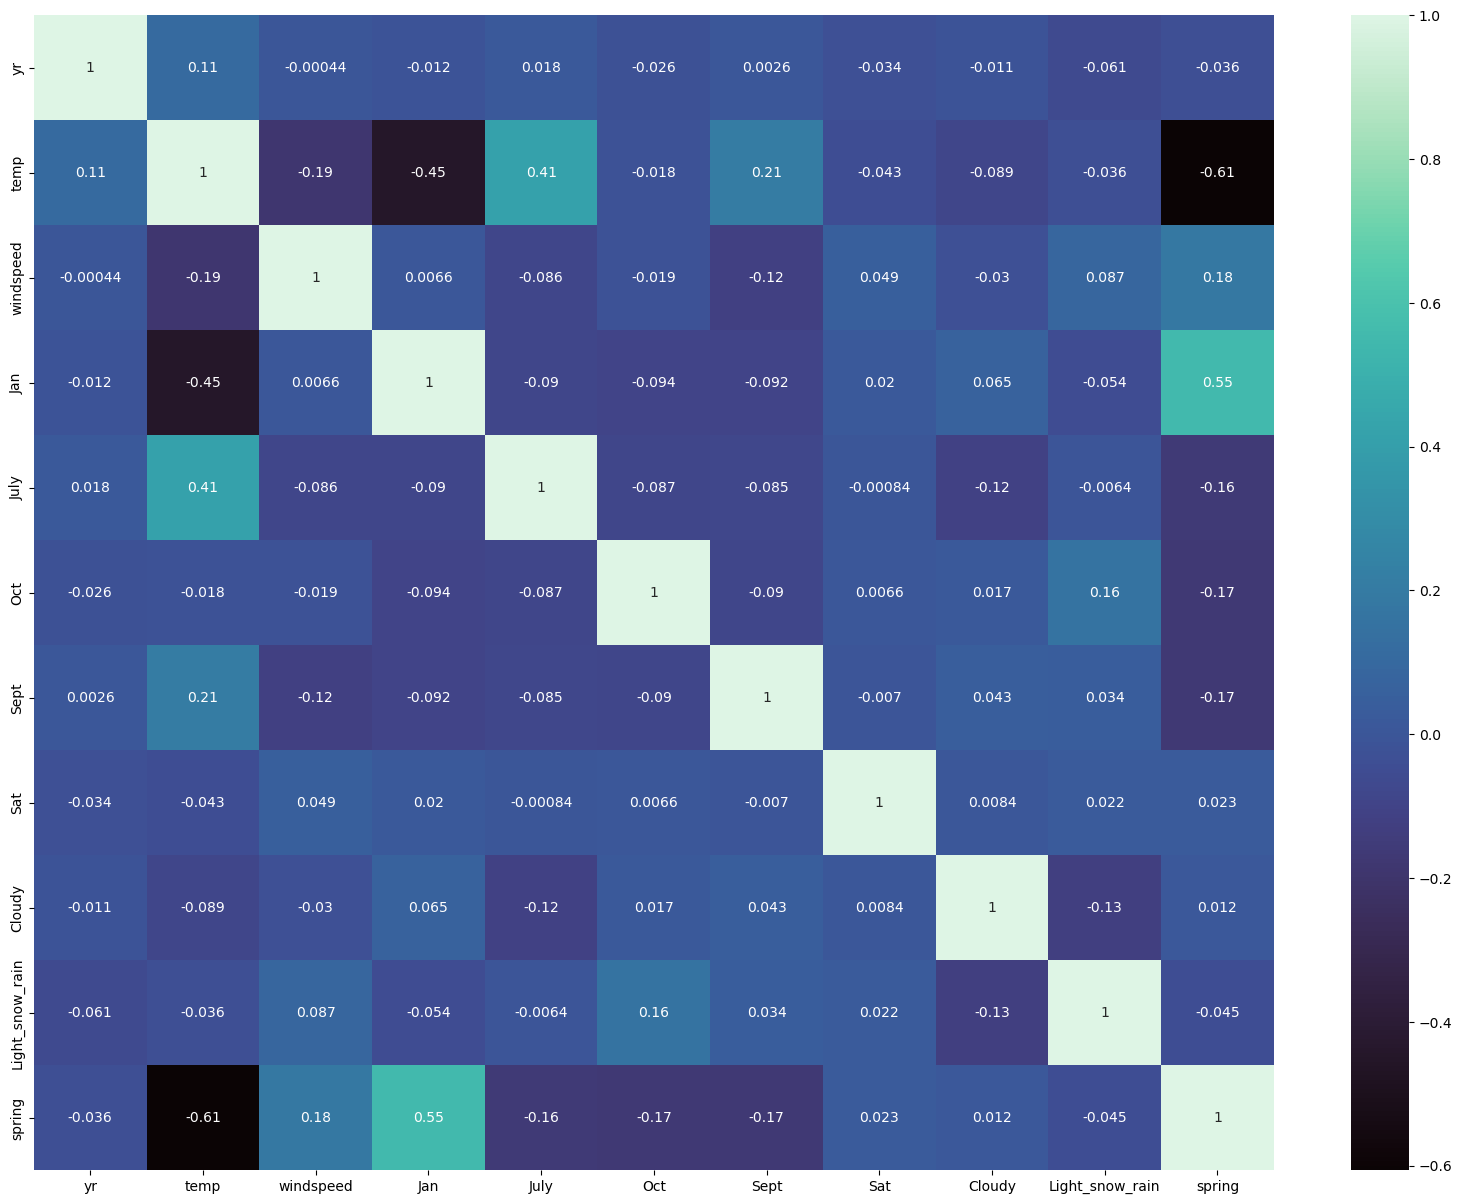

In [57]:
# heatmap for the final model dataframe.
plt.figure(figsize=(20,15))
sns.heatmap(X_train_rfe.corr(),annot=True,cmap='mako')
plt.show()

### Residual Analysis

In [58]:
# adding constant to final model variables.
X_train_rfe = sm.add_constant(X_train_rfe)

In [59]:
# predicting the y train values with x train 
y_train_pred = lr_5.predict(X_train_rfe)

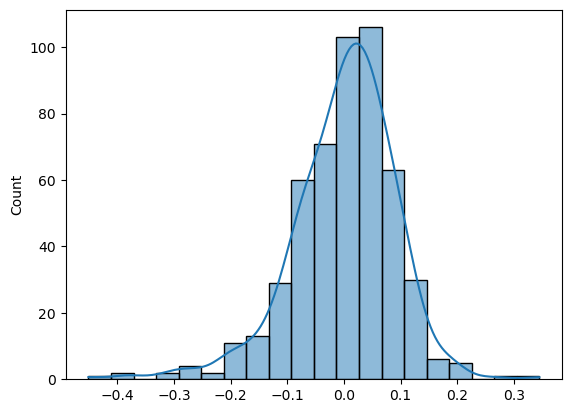

In [60]:
# checking normality of error terms
sns.histplot(x=(y_train - y_train_pred),bins=20,kde=True)
plt.show()

```
Error terms are normally distributed.
```

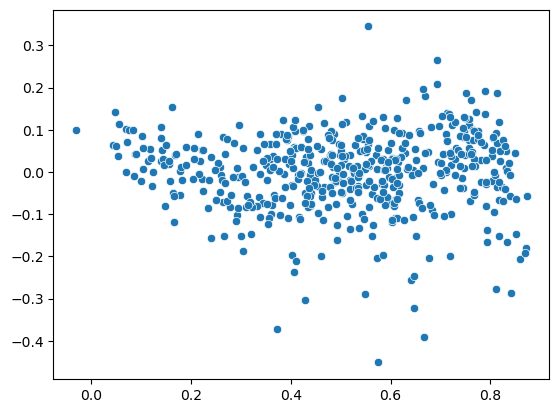

In [61]:
# Homoscedasticity check (There should be no visible pattern in residual values.)
sns.scatterplot(x=y_train_pred,y=(y_train - y_train_pred))
plt.show()

```
There is no visible pattern in residual values.
```

### Prediction on test data

In [62]:
# scaling the test data with train data scaler.

test_df[numerical_variables] = scaler.transform(test_df[numerical_variables])
test_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept,Mon,Sat,Sun,Thurs,Tues,Wed,Cloudy,Light_snow_rain,spring,summer,winter
184,0,1,0,0.831783,33.27085,0.657364,0.084219,0.692706,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
535,1,0,1,0.901354,36.04875,0.610133,0.153728,0.712034,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,22.85230,0.837699,0.334206,0.303382,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
221,0,0,1,0.881625,34.24915,0.437098,0.339570,0.547400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,32.19710,0.314298,0.537414,0.569029,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [63]:
# checking the statistical data after scaling.
test_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept,Mon,Sat,Sun,Thurs,Tues,Wed,Cloudy,Light_snow_rain,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,24.250312,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.318182,0.027273,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,8.281075,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.466833,0.163248,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,4.941955,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,17.090025,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,24.700000,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,31.124313,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,41.318550,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
# dividing the data into dependent and independent features. 
y_test = test_df.pop("cnt")
X_test = test_df

In [65]:
# creating X_test_rfe with final model features and removing all the other features.
X_test_rfe = X_test[[ 'yr', 'temp', 'windspeed', 'Jan', 'July', 'Oct', 'Sept', 'Sun','Cloudy', 'Light_snow_rain', 'spring']]
X_test_rfe = sm.add_constant(X_test_rfe)
X_test_rfe.head()

,const,yr,temp,windspeed,Jan,July,Oct,Sept,Sun,Cloudy,Light_snow_rain,spring
184,1.0,0,0.831783,0.084219,0,1,0,0,0,1,0,0
535,1.0,1,0.901354,0.153728,0,0,0,0,0,0,0,0
299,1.0,0,0.511964,0.334206,0,0,1,0,0,1,0,0
221,1.0,0,0.881625,0.339570,0,0,0,0,0,0,0,0
152,1.0,0,0.817246,0.537414,0,0,0,0,0,0,0,0


In [66]:
# predicting the y test values with x test
y_test_pred = lr_5.predict(X_test_rfe)

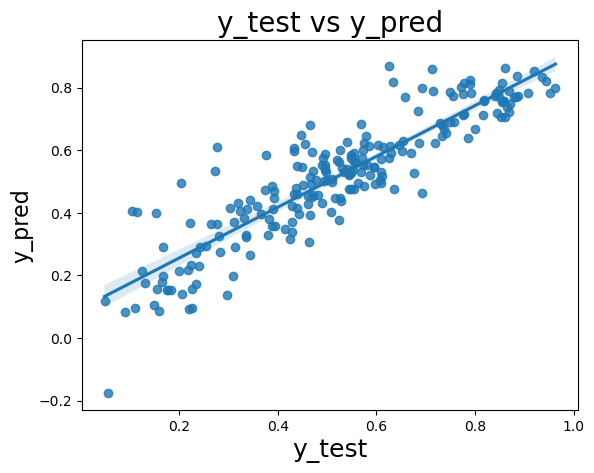

In [67]:
sns.regplot(x=(y_test),y=(y_test_pred),fit_reg=True)
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

#### R2 Score

In [68]:
# calculating the r2 score for both training dataset and testing dataset
print('Train r2: ',r2_score(y_true=y_train,y_pred=y_train_pred))
print('Test r2: ',r2_score(y_true=y_test,y_pred=y_test_pred))

Train r2:  0.8316884458215058
Test r2:  0.8047617269704195


In [69]:
# checking the mean squared error for both training and testing dataset.
print('Train mean squared error: ',mean_squared_error(y_true=y_train,y_pred=y_train_pred))
print('Test mean squared error: ',mean_squared_error(y_true=y_test,y_pred=y_test_pred))

Train mean squared error:  0.008460342876490652
Test mean squared error:  0.009335177357191051


In [70]:
# final model params
lr_5.params

const              0.297184
yr                 0.237132
temp               0.388947
windspeed         -0.160217
Jan               -0.050699
July              -0.064112
Oct                0.052266
Sept               0.060748
Sat                0.023058
Cloudy            -0.078506
Light_snow_rain   -0.290117
spring            -0.121727
dtype: float64

# Final Equation

```
cnt = yr*0.237132 + temp*0.388947 + windspeed*(-0.160217) + Jan*(-0.050699) + July*(-0.064112) + Oct*0.052266 + Sept*0.060748 + Sat*0.023058 + Cloudy*(-0.078506) + Light_snow_rain*(-0.290117) + spring*(-0.121727) + 0.297184 
```